
# Walkability Index EDA 

This notebook analyzes walkability scores across U.S. Census block groups to identify areas where walkability changes dramatically between adjacent neighborhoods. These insights may inform city planning or infrastructure investment.

---

### 📦 Required Packages

This notebook uses the following libraries:

- `pandas`
- `matplotlib`
- `seaborn`
- `geopandas`
- `shapely`

Please install them with:

```bash
pip install pandas matplotlib seaborn geopandas shapely
```


# Walkability Index EDA
# Introduction and Guiding Questions

The data set we are using for this is the Envoriomental Proctection Agency's (EPA) Walkability Index data set. This data set uses the smart location database and 2019 census data to score block groups based on their relative walkability. As defined on the Data.gov site "Walkability depends upon characteristics of the built environment that influence the likelihood of walking being used as a mode of travel." 

This Exploratory data analysis looks into exploring the disparities in walkability across neighboring Census block groups to identify spatial gaps that may inform urban planning decisions. This research is impactful to urban city planners to help make more informed decisions when looking at where to develop. By better understsanding where the disparities exist around the country, especially between areas with high walkability scores adjacent to areas with low walkability scores, we can help improve our communities.

Our guiding question: " Are there clusters of high walkability surrounded by low-walkability areas?"
Idea: Identify geographic areas (tracts or block groups) with high walkability scores that are directly adjacent to low or medium ones"



In [2]:
import pandas as pd

# Load the dataset
# df = pd.read_csv("100count.csv")
df = pd.read_csv("EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv")
df.head()


,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.810000e+11,4.810000e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.810000e+11,4.810000e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.810000e+11,4.810000e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.810000e+11,4.810000e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.810000e+11,4.810000e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


In [16]:
df.info(verbose=True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220740 entries, 0 to 220739
Data columns (total 117 columns):
 #    Column        Non-Null Count   Dtype  
---   ------        --------------   -----  
 0    OBJECTID      220740 non-null  int64  
 1    GEOID10       220739 non-null  float64
 2    GEOID20       220740 non-null  float64
 3    STATEFP       220740 non-null  int64  
 4    COUNTYFP      220740 non-null  int64  
 5    TRACTCE       220740 non-null  int64  
 6    BLKGRPCE      220740 non-null  int64  
 7    CSA           167709 non-null  float64
 8    CSA_Name      167709 non-null  object 
 9    CBSA          203645 non-null  float64
 10   CBSA_Name     203645 non-null  object 
 11   CBSA_POP      220740 non-null  int64  
 12   CBSA_EMP      220740 non-null  int64  
 13   CBSA_WRK      220740 non-null  int64  
 14   Ac_Total      220740 non-null  float64
 15   Ac_Water      220740 non-null  float64
 16   Ac_Land       220740 non-null  float64
 17   Ac_Unpr       220740 non-nu

## Data Preperation and Cleaning
This data set is a relatively large data set, with 220,740 rows and 117 columns. Since these will not all be useful in our analysis it will make sense to remove unused columns in order of efficiency. We need to ensure that all data has applicable values in order to facilitate our analysis. Looking through the columns that do not have all 220,740 records we see that there are 11 columns that do not contain entries for all records:
| Column Name | Number of Non Null | Number of Null |
| --- | --- | --- |
| GEOID10 | 220739 | 1 |
| CSA | 167709 | 53031 |
| CSA_Name | 167709 | 53031 |
| CBSA | 203645 | 17095 |
| CBSA_Name | 203645 | 17095 |
| CountHU | 220465 | 275 |
| HH | 220465 | 275 |
| D1A | 220469 | 271 |
| D1C8_OFF | 220135 | 605 |
| D4D | 220739 | 1 |
| D4E | 220739 | 1 |



For our analysis, CSA and CSA_Name are not needed columns so even though blanks make up nearly a quarter of our data, we can drop these columns. These columns represent the Combined Statisical Area Code and Name of Combined Statistical Area code. These are not used in defining the Census Block Groups or any of the other calculated fields within this data set. 

In [41]:
'Add Components here for Data Validation and Sanity '
validated_df = df.drop(columns = ['CSA', 'CSA_Name'])
validated_df.info(verbose=True, show_counts= True)
#null_data = validated_df[validated_df['GEOID10'].isna()]
#null_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220740 entries, 0 to 220739
Data columns (total 115 columns):
 #    Column        Non-Null Count   Dtype  
---   ------        --------------   -----  
 0    OBJECTID      220740 non-null  int64  
 1    GEOID10       220739 non-null  float64
 2    GEOID20       220740 non-null  float64
 3    STATEFP       220740 non-null  int64  
 4    COUNTYFP      220740 non-null  int64  
 5    TRACTCE       220740 non-null  int64  
 6    BLKGRPCE      220740 non-null  int64  
 7    CBSA          203645 non-null  float64
 8    CBSA_Name     203645 non-null  object 
 9    CBSA_POP      220740 non-null  int64  
 10   CBSA_EMP      220740 non-null  int64  
 11   CBSA_WRK      220740 non-null  int64  
 12   Ac_Total      220740 non-null  float64
 13   Ac_Water      220740 non-null  float64
 14   Ac_Land       220740 non-null  float64
 15   Ac_Unpr       220740 non-null  float64
 16   TotPop        220740 non-null  int64  
 17   CountHU       220465 non-nu

After Removing these columns, the number of missing values for the rest of our columns remain unchanged. 
| Column Name | Number of Non Null | Number of Null |
| --- | --- | --- |
| GEOID10 | 220739 | 1 |
| CBSA | 203645 | 17095 |
| CBSA_Name | 203645 | 17095 |
| CountHU | 220465 | 275 |
| HH | 220465 | 275 |
| D1A | 220469 | 271 |
| D1C8_OFF | 220135 | 605 |
| D4D | 220739 | 1 |
| D4E | 220739 | 1 |

In [55]:
'''Overall Data Validation Steps'''
null_geoid = validated_df[validated_df['GEOID10'].isna()]
null_geoid.head()

null_cbsa = validated_df[validated_df['CBSA'].isna()]
null_cbsa[['CBSA', 'CBSA_Name']]

null_countHU = validated_df[validated_df['CountHU'].isna()]
null_countHU[['CountHU', 'HH']]

null_d1a = validated_df[validated_df['D1A'].isna()]
null_d1a.head()

null_d1c8_off = validated_df[validated_df['D1C8_OFF'].isna()]
null_d1c8_off.head()

null_d4d = validated_df[validated_df['D4D'].isna()]
null_d4d.head()

null_d4e = validated_df[validated_df['D4E'].isna()]
null_d4e[['GEOID10', 'D4D', 'D4E']]

validated_noNaN_df = validated_df.dropna()
validated_noNaN_df.info(verbose = True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Index: 203106 entries, 0 to 220650
Data columns (total 115 columns):
 #    Column        Non-Null Count   Dtype  
---   ------        --------------   -----  
 0    OBJECTID      203106 non-null  int64  
 1    GEOID10       203106 non-null  float64
 2    GEOID20       203106 non-null  float64
 3    STATEFP       203106 non-null  int64  
 4    COUNTYFP      203106 non-null  int64  
 5    TRACTCE       203106 non-null  int64  
 6    BLKGRPCE      203106 non-null  int64  
 7    CBSA          203106 non-null  float64
 8    CBSA_Name     203106 non-null  object 
 9    CBSA_POP      203106 non-null  int64  
 10   CBSA_EMP      203106 non-null  int64  
 11   CBSA_WRK      203106 non-null  int64  
 12   Ac_Total      203106 non-null  float64
 13   Ac_Water      203106 non-null  float64
 14   Ac_Land       203106 non-null  float64
 15   Ac_Unpr       203106 non-null  float64
 16   TotPop        203106 non-null  int64  
 17   CountHU       203106 non-null  f

In [57]:
'''Find the NaN values in the CBSA Column and display CBSA and CBSA_Name columns to show all NaN values match'''
null_cbsa = validated_df[validated_df['CBSA'].isna()]
null_cbsa[['CBSA', 'CBSA_Name']].head()

,CBSA,CBSA_Name
78,NaN,NaN
301,NaN,NaN
302,NaN,NaN
303,NaN,NaN
307,NaN,NaN


In [58]:
'''Find the NaN values in the CountHU Column and display CountHU and HH columns to show all NaN values match'''
null_countHU = validated_df[validated_df['CountHU'].isna()]
null_countHU[['CountHU', 'HH']].head()

,CountHU,HH
217782,NaN,NaN
217783,NaN,NaN
217784,NaN,NaN
217785,NaN,NaN
217786,NaN,NaN


In [59]:
'''Find the NaN values in the D1A Column'''
null_d1a = validated_df[validated_df['D1A'].isna()]
null_d1a.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CBSA,CBSA_Name,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
217783,217784,6.600000e+11,6.600000e+11,66,10,950900,2,NaN,NaN,0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,2911.113746,310631.5121
217784,217785,6.600000e+11,6.600000e+11,66,10,950900,1,NaN,NaN,0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,3620.625511,537172.4272
217785,217786,6.600000e+11,6.600000e+11,66,10,950702,5,NaN,NaN,0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,1428.524210,128113.0739
217786,217787,6.600000e+11,6.600000e+11,66,10,955800,2,NaN,NaN,0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,3427.807087,572955.6506
217787,217788,6.600000e+11,6.600000e+11,66,10,953000,3,NaN,NaN,0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,3338.033915,367163.9545


In [60]:
'''Find the NaN values in the D1C8_OFF Column'''
null_d1c8_off = validated_df[validated_df['D1C8_OFF'].isna()]
null_d1c8_off.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CBSA,CBSA_Name,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
370,371,4.820000e+11,4.820000e+11,48,245,990000,0,13140.0,"Beaumont-Port Arthur, TX",395636,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,123682.03530,292603576.0
1810,1811,4.800000e+11,4.800000e+11,48,39,990000,0,26420.0,"Houston-The Woodlands-Sugar Land, TX",6779104,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,115002.89760,311207710.6
4527,4528,4.850000e+11,4.850000e+11,48,489,990000,0,39700.0,"Raymondville, TX",21754,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,54567.64424,121643001.5
7259,7260,4.800000e+11,4.800000e+11,48,7,990000,0,40530.0,"Rockport, TX",24763,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,72916.79509,160516156.6
7811,7812,4.830000e+11,4.830000e+11,48,261,990000,0,28780.0,"Kingsville, TX",32020,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,163671.46380,394661265.4


In [61]:
'''Find the NaN values in the D4D Column'''
null_d4d = validated_df[validated_df['D4D'].isna()]
null_d4d.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CBSA,CBSA_Name,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
220705,220706,NaN,7.800000e+11,78,10,990000,0,NaN,NaN,0,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.0,226686.1623,627930512.6


In [62]:
'''Find the NaN values in the D4E Column'''
null_d4e = validated_df[validated_df['D4E'].isna()]
null_d4e[['GEOID10', 'D4D', 'D4E']]

,GEOID10,D4D,D4E
220705,NaN,NaN,NaN


In [68]:
'''Display the new dataframe after dropping NaN values'''
validated_noNaN_df = validated_df.dropna()
validated_noNaN_df.info(verbose = True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Index: 203106 entries, 0 to 220650
Data columns (total 115 columns):
 #    Column        Non-Null Count   Dtype  
---   ------        --------------   -----  
 0    OBJECTID      203106 non-null  int64  
 1    GEOID10       203106 non-null  float64
 2    GEOID20       203106 non-null  float64
 3    STATEFP       203106 non-null  int64  
 4    COUNTYFP      203106 non-null  int64  
 5    TRACTCE       203106 non-null  int64  
 6    BLKGRPCE      203106 non-null  int64  
 7    CBSA          203106 non-null  float64
 8    CBSA_Name     203106 non-null  object 
 9    CBSA_POP      203106 non-null  int64  
 10   CBSA_EMP      203106 non-null  int64  
 11   CBSA_WRK      203106 non-null  int64  
 12   Ac_Total      203106 non-null  float64
 13   Ac_Water      203106 non-null  float64
 14   Ac_Land       203106 non-null  float64
 15   Ac_Unpr       203106 non-null  float64
 16   TotPop        203106 non-null  int64  
 17   CountHU       203106 non-null  f

As you can see above, for the columns that have the same amount of missing data these missing elements are all on the same row. This is because the data is dependent on each other, which means if you had an NaN value in CBSA you will also have an NaN value in your CBSA_Name. We decided to remove all these records with NaN values, which totalled 17634 records, or roughly 8% of our records.

## Exploratory Analysis and Findings


### Calculating Walkability Gaps

To find where walkability shifts, calculate the difference in walkability index between each block group and the next one in the same tract. This gives us a `Walkability_Gap` column, which we use to identify hotspots. 


In [66]:
# Sort by tract and block group to simulate proximity
walk_df = validated_noNaN_df[['GEOID10', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'NatWalkInd']].copy()
walk_df = walk_df.sort_values(by=['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE'])

# Compute differences
walk_df['Next_NatWalkInd'] = walk_df['NatWalkInd'].shift(-1)
walk_df['Next_GEOID10'] = walk_df['GEOID10'].shift(-1)
walk_df['Walkability_Gap'] = abs(walk_df['NatWalkInd'] - walk_df['Next_NatWalkInd'])

# Flag if in same tract
walk_df['Same_Tract'] = walk_df['TRACTCE'] == walk_df['TRACTCE'].shift(-1)

# Filter large gaps
gaps_df = walk_df[walk_df['Same_Tract'] & (walk_df['Walkability_Gap'] > 5)]
gaps_df.head()

,GEOID10,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,NatWalkInd,Next_NatWalkInd,Next_GEOID10,Walkability_Gap,Same_Tract
22527,1.005951e+10,1,5,950600,1,11.000000,2.666667,1.005951e+10,8.333333,True
23252,1.007010e+10,1,7,10002,2,2.666667,7.833333,1.007010e+10,5.166667,True
22681,1.015001e+10,1,15,1201,1,6.333333,13.000000,1.015001e+10,6.666667,True
23510,1.015002e+10,1,15,1600,3,9.000000,3.666667,1.015002e+10,5.333333,True
24229,1.015002e+10,1,15,2102,1,4.000000,11.000000,1.015002e+10,7.000000,True


## Visualize Walkability Gaps with Histogram

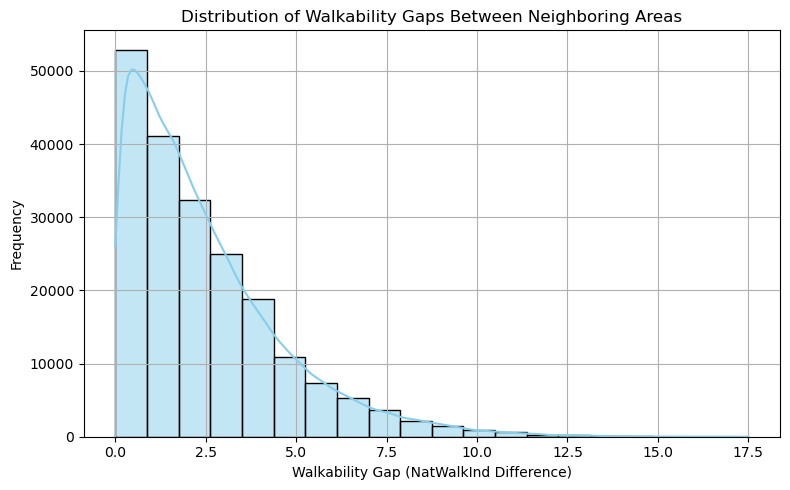

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(walk_df['Walkability_Gap'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Walkability Gaps Between Neighboring Areas")
plt.xlabel("Walkability Gap (NatWalkInd Difference)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


### Understanding the Histogram: Walkability Gaps Between Neighbors

This histogram shows **how common different sizes of walkability gaps are** between neighboring Census block groups within the same tract.

- The **x-axis** represents the **difference in walkability scores** (`NatWalkInd`) between adjacent block groups.
- The **y-axis** shows **how many times** that size of gap appears in the dataset.

As we see, most neighboring block groups do not differ highly in score, with most having walkability score within 0-2 points of each other. Because the Walkability scale is from 0-20, the data fits our expectation that no groups have a difference greater than 20. From this chart we do see that some areas have large changes in walkability, with scores differing from 5 to even 10 points. This may represent areas where there are large physical or infrastructutal barriers between these regions. These large-gap areas are the focus for our exploaratory data analysis, representing potential candidates for **urban planning interventions** such as adding sidewalks, improving crossings, or adjusting transportation routes to improve the walkability for these lower scoring areas.


**Exploratory Question:**  
Are there cases where neighboring Census block groups show large differences in walkability, suggesting spatial gaps that could be targeted for infrastructure improvements?

**Approach:**  
Using the Walkability Index dataset, I analyzed block groups within the same Census tracts to identify large differences in the National Walkability Index (`NatWalkInd`). 

**Findings:**  
Several block groups showed walkability differences of over 5 points despite being in the same tract. These gaps suggest discontinuities in infrastructure, zoning, or accessibility.

**Next Steps:**  
Use actual geographic coordinates or shapefiles to map these areas more accurately and present findings to urban planners or local government stakeholders.


# Walkability Index EDA with County Mapping

This notebook identifies areas with large walkability differences between adjacent block groups and maps them to their respective counties and states using FIPS codes.

In [14]:
import pandas as pd

# Load the full walkability dataset
# df = pd.read_csv("100records.csv")
df = pd.read_csv("EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv")

# Pad state and county codes
df['STATEFP'] = df['STATEFP'].astype(str).str.zfill(2)
df['COUNTYFP'] = df['COUNTYFP'].astype(str).str.zfill(3)



### Calculating Walkability Gaps

To find where walkability shifts sharply, we calculate the difference in walkability index between each block group and the next one in the same tract. This gives us a `Walkability_Gap` column, which we use to identify hotspots.


In [15]:
# Sort to simulate neighboring block groups
walk_df = df[['GEOID10', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'NatWalkInd']].copy()
walk_df = walk_df.sort_values(by=['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE'])

# Compute walkability differences between neighbors
walk_df['Next_NatWalkInd'] = walk_df['NatWalkInd'].shift(-1)
walk_df['Next_GEOID10'] = walk_df['GEOID10'].shift(-1)
walk_df['Walkability_Gap'] = abs(walk_df['NatWalkInd'] - walk_df['Next_NatWalkInd'])
walk_df['Same_Tract'] = walk_df['TRACTCE'] == walk_df['TRACTCE'].shift(-1)

# Filter for gaps >= 10
gap_df = walk_df[walk_df['Same_Tract'] & (walk_df['Walkability_Gap'] >= 10)].copy()


In [17]:
# Load national county FIPS lookup
fips_df = pd.read_csv("national_county.txt", header=None, dtype=str)
fips_df.columns = ['State_Abbr', 'StateFIPS', 'CountyFIPS', 'County_Name', 'Class_Code']
fips_df['STATEFP'] = fips_df['StateFIPS'].str.zfill(2)
fips_df['COUNTYFP'] = fips_df['CountyFIPS'].str.zfill(3)
fips_df['County_Full'] = fips_df['County_Name'] + " County"

# Merge to gap data
county_lookup = fips_df[['STATEFP', 'COUNTYFP', 'County_Full']]
gap_df = gap_df.merge(county_lookup, on=['STATEFP', 'COUNTYFP'], how='left')
gap_df['County_Name'] = gap_df['County_Full']


In [19]:
# State FIPS code to state name
state_fips = {
    '01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas',
    '06': 'California', '08': 'Colorado', '09': 'Connecticut', '10': 'Delaware',
    '11': 'District of Columbia', '12': 'Florida', '13': 'Georgia', '15': 'Hawaii',
    '16': 'Idaho', '17': 'Illinois', '18': 'Indiana', '19': 'Iowa',
    '20': 'Kansas', '21': 'Kentucky', '22': 'Louisiana', '23': 'Maine',
    '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan', '27': 'Minnesota',
    '28': 'Mississippi', '29': 'Missouri', '30': 'Montana', '31': 'Nebraska',
    '32': 'Nevada', '33': 'New Hampshire', '34': 'New Jersey', '35': 'New Mexico',
    '36': 'New York', '37': 'North Carolina', '38': 'North Dakota', '39': 'Ohio',
    '40': 'Oklahoma', '41': 'Oregon', '42': 'Pennsylvania', '44': 'Rhode Island',
    '45': 'South Carolina', '46': 'South Dakota', '47': 'Tennessee', '48': 'Texas',
    '49': 'Utah', '50': 'Vermont', '51': 'Virginia', '53': 'Washington',
    '54': 'West Virginia', '55': 'Wisconsin', '56': 'Wyoming'
}
gap_df['State_Name'] = gap_df['STATEFP'].map(state_fips)


## Top Walkability Gaps (≥ 10) by Location

In [20]:
# Final output
named_gaps = gap_df[['GEOID10', 'Next_GEOID10', 'State_Name', 'County_Name',
                     'NatWalkInd', 'Next_NatWalkInd', 'Walkability_Gap']].sort_values(
    by='Walkability_Gap', ascending=False)

named_gaps.head(20)


,GEOID10,Next_GEOID10,State_Name,County_Name,NatWalkInd,Next_NatWalkInd,Walkability_Gap
437,3.610000e+11,3.610000e+11,New York,New York County County,1.000000,18.333333,17.333333
438,3.610000e+11,3.610000e+11,New York,New York County County,1.000000,17.833333,16.833333
393,3.600000e+11,3.600000e+11,New York,Kings County County,1.000000,17.166667,16.166667
39,6.019008e+10,6.019008e+10,California,Fresno County County,3.666667,19.833333,16.166667
518,4.100000e+11,4.100000e+11,Oregon,Baker County County,3.666667,19.666667,16.000000
441,3.610000e+11,3.610000e+11,New York,New York County County,1.000000,16.666667,15.666667
233,1.720000e+11,1.720000e+11,Illinois,Sangamon County County,17.833333,2.166667,15.666667
520,4.100000e+11,4.100000e+11,Oregon,Columbia County County,3.333333,18.833333,15.500000
440,3.610000e+11,3.610000e+11,New York,New York County County,1.000000,16.333333,15.333333
459,3.610000e+11,3.610000e+11,New York,Queens County County,1.000000,16.166667,15.166667




In the full dataset, we identified several Census block group pairs with **walkability index gaps greater than 14 points**, and in some cases exceeding **17 points**. These are highly unusual differences within adjacent areas, given the index scale ranges from 0 to 20.

Such sharp transitions in walkability were found in locations such as:

- **New York County, NY** (Manhattan)
- **Kings County, NY** (Brooklyn)
- **Fresno County, CA**
- **Baker County, OR**
- **Sangamon County, IL**
- **Tillamook, Malheur, Columbia Counties, OR**
- **Litchfield County, CT**

These gaps suggest that one side of a block boundary may offer dense, walkable infrastructure, while the adjacent block is signifi


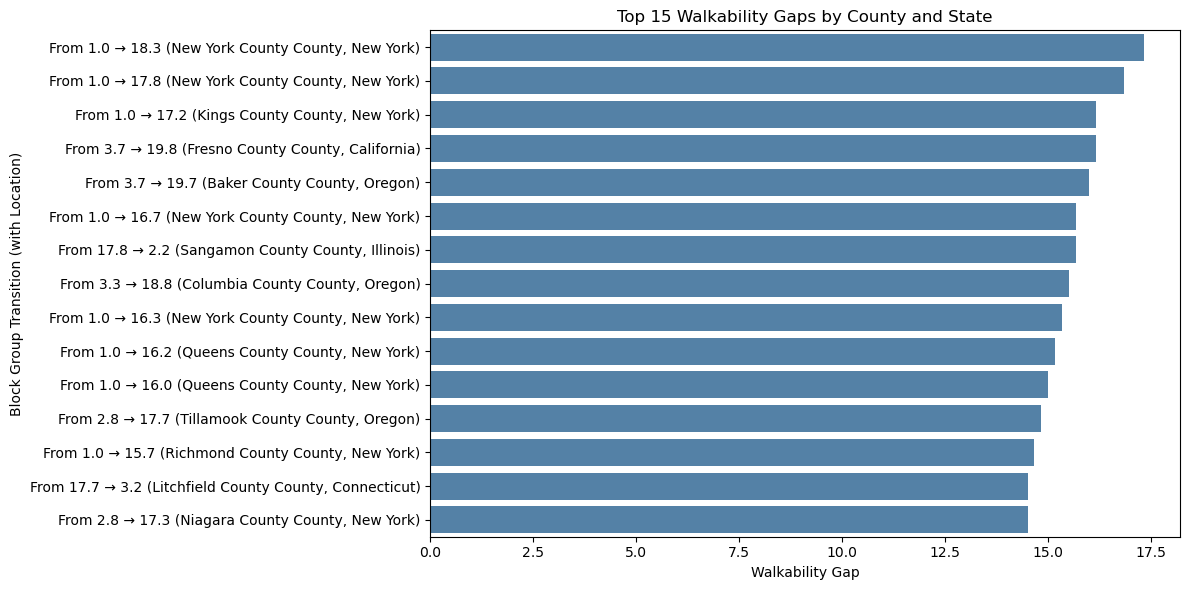

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and sort the top 15 gaps
top_gaps = gap_df.sort_values(by="Walkability_Gap", ascending=False).head(15).copy()

# Create a readable label
top_gaps['label'] = (
    "From " + top_gaps['NatWalkInd'].round(1).astype(str) +
    " → " + top_gaps['Next_NatWalkInd'].round(1).astype(str) +
    " (" + top_gaps['County_Name'].fillna("Unknown") + ", " +
    top_gaps['State_Name'].fillna("Unknown") + ")"
)

# Plot horizontal bar chart with a blue color
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_gaps,
    y='label',
    x='Walkability_Gap',
    color='steelblue'  # blue tone
)
plt.xlabel("Walkability Gap")
plt.ylabel("Block Group Transition (with Location)")
plt.title("Top 15 Walkability Gaps by County and State")
plt.tight_layout()
plt.show()


## Ivan your insight goes here

## Assumptions and Limitations

* Assumptions: 
While this data set has very well defined data without many issues in terms of missing data, the data used was from the 2019 census. This means changes that have occured between 2019 and 2025 are not captured in this analysis so findings from this EDA need to be reviewed if this data has changed at all in the past 6 years for the various locations. This is also only applicable to the United States as this is where the data was collected for. Another consideration that needs to be made is how the walkability index is being calculated. If the EPA decided to adjust the weights for the various measures that combine to be the walkability score, that could result in different scores.

* Limitations:
The data and the anaylsis was from US Census data from 2010.  There have been many changes since the data was collection and there is no walkability data from this year.



## Conclusion: Target Areas for Walkability Investment

A large walkability gap between two neighboring Census block groups — for example, **“From 2.8 → 17.3 (Fresno County, CA)”** — indicates a sharp contrast in how easily people can walk to destinations like stores, schools, parks, or transit.

In this example:
- One block group has a very **low walkability index** (2.8), meaning it likely lacks sidewalks, pedestrian infrastructure, or accessible amenities.
- The adjacent block group has a **very high index** (17.3), indicating a walkable, well-connected environment.

###  Why This Matters
Such large differences (typically **gaps > 10 points**) highlight potential **urban planning opportunities**. They may indicate:
- Physical barriers (e.g., highways, rail lines, zoning changes)
- Underserved neighborhoods next to highly walkable areas
- Infrastructure gaps that could be addressed with targeted investments

###  For City Planners
These locations are **prime candidates for intervention**, where adding:
- Sidewalks or pedestrian crossings
- Transit stops
- Bike paths or zoning improvements

could significantly improve walkability and equitable access across the community.

> Large walkability gaps help city planners identify **where walkability ends abruptly — and where it could be extended**.
